<a href="https://colab.research.google.com/github/janorena/modelado-y-simulacion/blob/master/PROYECTO_modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jorge Andrés Noreña García - 816543

## Introducción
El sistema de Lorenz fue estudiado por el metereólogo Edward Norton Lorenz cuando investigaba modelos matemáticos para predecir el comportamiento de los gases en la atmósfera, y fue publicado en [15]. Desde entonces han aparecido en la literatura sistemas caóticos con estructura similar al de Lorenz a los que se les ha llamado sistemas Tipo Lorenz: sistema de Chen [2, 5], sistema de Lü $[3,6,18],$ Li-Wang [12] $\mathrm{y}$ otros [7,8,16,19,22]
Xianyi Li y Qianjun Ou en [13] estudian el sistema Tipo Lorenz,



$\begin{aligned} \dot{x} &=a(y-x) \\ \dot{y} &=d y-x z \\ \dot{z} &=g x y-b z+f x^{2} \end{aligned}$

## Propiedades del sistema
Li y Ou en [13] encontraron para el sistema (1) que para los parámetros $(a, b, d, f, g)=(10,3,6,1,0)$, se observa que dos de estos exponentes son mayores de cero lo que caracteriza la aparición de una orbita caótica. En la Figura 1 se muestra un atractor caótico del sistema, la gráfica corresponde a la órbita con condición inicial $(x, y, z)=\left(\frac{23}{20}, \frac{33}{10}, \frac{7}{2}\right)$

In [9]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

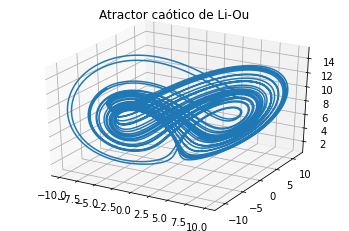

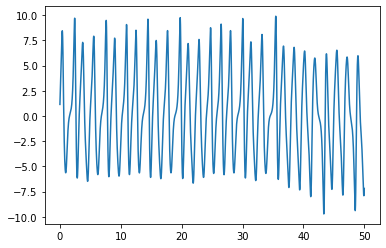

In [10]:
def Lorenz_equation1(t,xyz,a,b,d,f,g):
  x, y, z = xyz
  return[a*(y-x), d*y-x*z , g*x*y-b*z+f*(x**2)]

def event_lorenz(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return x + y

tend=50
val_ini=[23/20,33/10,7/2]
t = np.linspace(0,tend,10000)
a,b,d,f,g = 10, 3, 6, 1, 0
sol_leq = solve_ivp(Lorenz_equation1,[0,tend],val_ini,args=(a,b,d,f,g),t_eval=t, events = event_lorenz)

fig, (ax2) = plt.subplots(1, sharex=True)
ax2 = plt.axes(projection='3d')
ax2.plot3D(sol_leq.y[0],sol_leq.y[1],sol_leq.y[2])

plt.title('Atractor caótico de Li-Ou')
fig, (ax1) = plt.subplots(1, sharex=True)
ax1=plt.plot(sol_leq.t,sol_leq.y[0])

## **Teorema 1** 

Cuando $a>0, b>0, d>0, f=0$ y $g>0,$ las siguientes afirmaciones son válidas para el sistema (1)
1. Cuando $0<d<\frac{a+b}{3},$ los puntos de equilibrio $P_{1}$ y $P_{2}$ son asintóticamente estables.
2. Cuando $\frac{a+b}{3}<d,$ los equilibrios $P_{1}$ y $P_{2}$ son inestables.
3. Cuando $d=\frac{a+b}{3}$, en cada equilibrio $P_{1}$ y $P_{2}$ surge una órbita periódica con periodo $T=\frac{2 \pi}{\sqrt{a b}}$
Por lo tanto el sistema presenta bifurcación de Hopf.

# Análisis de la bifurcación de Hopf

Esta sección se dedica a demostrar que la bifurcación de Hopf del sistema (1) cuya existencia se afirma en el Teorema 1 es no degenerada y supercritica.


para el caso 1 \\
$(a, b, d, f, g)=(\frac{6}{10}, \frac{6}{10}, \frac{3}{10}, 0, 2)$ \\
$(x, y, z)=\left(\frac{1}{4}, \frac{1}{4}, \frac{89}{100}\right)$


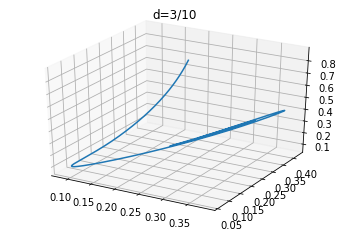

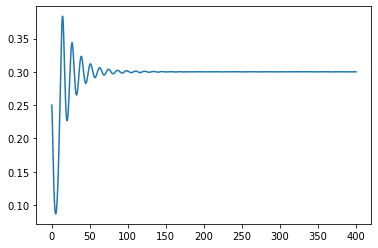

In [11]:
#SIN PARAMETRO DE ANTICONTROL
def Lorenz_equation(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return[a*(y-x), d*y-x*z , g*x*y-b*z+f*(x**2)]

def event_lorenz(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return x + y

a,b,d,f,g = 6/10, 6/10, 3/10, 0, 2
tend= 400
val_ini=[1/4,1/4,89/100]
t = np.linspace(0,tend,10000)


sol_leq = solve_ivp(Lorenz_equation,[0,tend],val_ini,args=(a,b,d,g,f),t_eval=t, events = event_lorenz)

ax = plt.axes(projection='3d')
ax.plot3D(sol_leq.y[0],sol_leq.y[1],sol_leq.y[2])
plt.title('d=3/10')
fig, (ax1) = plt.subplots(1, sharex=True)
ax1=plt.plot(sol_leq.t,sol_leq.y[0])

para el caso 2 \\
$(a, b, d, f, g)=(\frac{6}{10}, \frac{6}{10}, \frac{1}{2}, 0, 2)$ \\
$(x, y, z)=\left(\frac{1}{4}, \frac{1}{4}, \frac{89}{100}\right)$

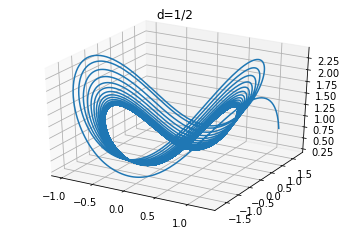

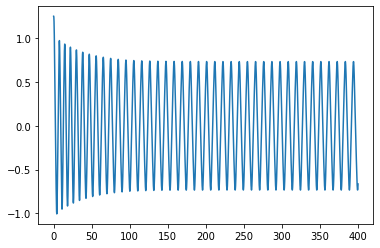

In [12]:
#SIN PARAMETRO DE ANTICONTROL
def Lorenz_equation(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return[a*(y-x), d*y-x*z , g*x*y-b*z+f*(x**2)]

def event_lorenz(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return x + y

a,b,d,f,g = 6/10, 6/10, 1/2, 0, 2
tend= 400
val_ini=[5/4,5/4,89/100]
t = np.linspace(0,tend,10000)


sol_leq = solve_ivp(Lorenz_equation,[0,tend],val_ini,args=(a,b,d,g,f),t_eval=t, events = event_lorenz)

ax = plt.axes(projection='3d')
ax.plot3D(sol_leq.y[0],sol_leq.y[1],sol_leq.y[2])
plt.title('d=1/2')
fig, (ax1) = plt.subplots(1, sharex=True)
ax1=plt.plot(sol_leq.t,sol_leq.y[0])

para el caso 3 \\
$(a, b, d, f, g)=(\frac{6}{10}, \frac{6}{10}, \frac{2}{5}, 0, 2)$ \\
$(x, y, z)=\left(\frac{1}{4}, \frac{1}{4}, \frac{89}{100}\right)$

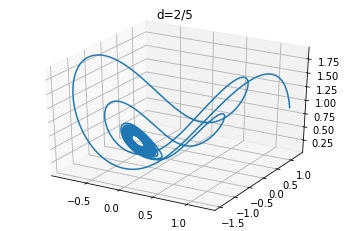

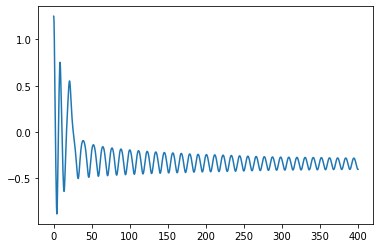

In [13]:
#SIN PARAMETRO DE ANTICONTROL
def Lorenz_equation(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return[a*(y-x), d*y-x*z , g*x*y-b*z+f*(x**2)]

def event_lorenz(t,xyz,a,b,d,g,f):
  x, y, z = xyz
  return x + y

a,b,d,f,g = 6/10, 6/10, 2/5, 0, 2
tend= 400
val_ini=[5/4,5/4,89/100]
t = np.linspace(0,tend,10000)


sol_leq = solve_ivp(Lorenz_equation,[0,tend],val_ini,args=(a,b,d,g,f),t_eval=t, events = event_lorenz)

ax = plt.axes(projection='3d')
ax.plot3D(sol_leq.y[0],sol_leq.y[1],sol_leq.y[2])
plt.title('d=2/5')
fig, (ax1) = plt.subplots(1, sharex=True)
ax1=plt.plot(sol_leq.t,sol_leq.y[0])

## diagrama de bifurcacion

In [ ]:
from time import time

event_lorenz.direction = -1
t = np.linspace(0,20,1)
val_ini=[0.1,0.1,0.1]
tic = time()
for r in np.arange(200,235,0.1):
  sol_leq = solve_ivp(Lorenz_equation,[0,20],val_ini,args=(a,b,r,g,r),t_eval=t, events = event_lorenz,rtol=1e-4,atol=1e-7)
  for i in range(len(sol_leq.t_events[0])):
    if sol_leq.t_events[0][i] > 2:
      plt.plot(r,sol_leq.y_events[0][i,1],".")
  val_ini = sol_leq.y[:,-1]   

toc=time()
print(toc-tic)